# Final Project: Preliminary Draft
**Melyssa Calegari Rein**

**12/07/2023**

## Introduction

### K-POP

Many think that K-POP is only a musical genre, but it is actually more than that. K-POP stands for Korean Popular Music, but it consists of an entire industry in Korea and the music produced by these artists can have many different genres, from pop to hiphop to R&B. 

K-POP is separated into generations, which are five for now. In the 90s, the first K-POP group was created, starting the first generation. This year, 2023, the industry is discussing if the fifth generation started. The divisions are not exactly clear dates, but there is a clearer understanding of the years in which the generations changed because of how different the music, production, and the industry was.

- **First generation (1996 - 2002):** It is not as known nowadays, but the most famous artists from that generation are H.O.T, SHINHWA, S.E.S, G.O.D and Fin.K.L.
- **Second generation (2003 - 2010):** Compared to the previous generation, this one is more known, probably because part of the groups are still active. The most famous groups are SHINEE, 2PM, f(x), SNSD (also known as Girls' Generation), TVXQ, and BIGBANG. 
- **Third generation (2011 - 2017):** These groups were created around the time that K-POP was starting to get more recognition around the world. The most famous groups are BTS, EXO, BLACKPINK, GOT7, MAMAMOO, MONSTA X, SEVENTEEN, TWICE, NCT, Red Velvet, iKON, and BTOB.
- **Fourth generation (2018 - 2022):** The most famous groups from this generation are STRAY KIDS, ATEEZ, NewJeans, TOMORROW X TOGETHER, (G)I-DLE, LE SSERAFIM, ITZY, THE BOYZ, and ENHYPEN.
- **Fifth generation (2023 - present):** Even though the industry is deciding if it just started, many groups were able to leave good impressions on the public with their debuts, singles, and comebacks. The most known ones are RIIZE, ZEROBASEONE, BOYNEXTDOOR, Xikers, KISS OF LIFE.

### Project

I have been listening to K-POP since 2021 and haven't entered in contact with much of the first and second generations at their peak. However, although I do not know exacly how they differ, whenever I listen to older generations tracks and newer generations, I can feel the difference. 

So, the objective of this project is discovering how these generations are different from one another. One of the selected generations is the second generation because they are more known than the first generation, consequently, there will be more famous songs to analyze. The other generation will be the fourth generation of K-POP because even if we consider that the Fifth is set, there are too few tracks to compare. Hence, this project will analyze the Second Generation and the Fourth Generation of KPOP in order to know how their song style differ from one another. 

In this project, to better determine the difference between their styles, Spotify API will be used in order to get information on two playlists' tracks using the *playlist endpoint*, and to get the audio features of each track using *tracks' audio features*. The audio features analyzed will be danceability, energy, tempo, valence, and speechiness. Spotify is a known music streaming platform, and its API gives information on different content it has on its platform (from albums to result of searches). The information given by the Spotify API is valuable and reliable in the sense that they are a famous company and a part of the data are facts (track names and songs' tempo). The part of the data that is not as reliable comprises of the danceability, energy, valence, and speechiness, as they are measured by Spotify and there is not much explanation of everything that they take into account to arrive to the final result. 

The theoretical hypothesis for this project is that there will be a notable difference in the audio features between their songs. Even though the energy will be similar because K-POP has always had energetic songs, but it also has slower songs due to the variety of genres in it. Dancebility will also be similar, while speechiness, valence, and tempo will have more higher scores for the Fourth Generation. My hypothesis is based on the songs I have listend to. 

#### Playlists

As mentioned above, playlists were used in this project. In order to have more accurate data, I created two playlists: one for the second generation, another for the fourth generation. 

The selection of songs were based on famous songs on music and video streaming platforms, as well as songs that are mentioned a lot on social media and that are the most known by K-POP fans. Another factor that played a role on which songs were selected was the artists, as I put songs by artists that are the most known in the industry as well as the ones that are mentioned more in social media -- or that had their comeback/debut promotion mentioned a lot. Title trakcs (main promoted song) and B-sides (other songs in an album) were used, but there are less B-sides as most are not too known, while the title tracks are the ones that many K-POP fans know.

I made sure that both playlists contained the same amount of songs, so it would be easier to analyze the amount of songs that were in each range, and it would not be unbalanced.

# Preparation 

To get all the data to complete the analysis, it is first necessary to import packages to be able to get information from Spotify API, as well as create tables and graphs.

In [1]:
import requests
import pandas as pd
import base64
import json
import numpy as np
from matplotlib import pyplot as plt

Then, I called the Client ID and the Client Secret, as to get a session key from the Spotify API it is necessary to have a client credential. The client ID and client secret should not be shown, that is why their values are not appearing.

In [2]:
Client_ID = pd.read_csv('Spotify_keys.txt')['Client_ID'].iloc[0]

In [3]:
Client_Secret = pd.read_csv('Spotify_keys.txt')['Client_Secret'].iloc[0]

In [4]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode('ascii'))

Then, I created a variable for the header, as one of the information Spotify API asks for when requesting a session key is the header. To get the client credentials to the Spotify API, the credentials were decoded by using the base64, as they are important information.

In [5]:
headers = {"Authorization": "Basic {}".format(client_cred.decode('ascii'))}

In [6]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [7]:
session_key_response = requests.post(url = url,data = payload, headers = headers)

As the status of the request was 200, it was successful, so I can start making requests. 

In [8]:
session_key_response.status_code

200

In [9]:
session_headers = {"Authorization": "Bearer {}".format(session_key_response.json()['access_token'])}

## Requesting information on the playlists

#### Second Generation playlist

After receiving access to the Spotify API, I got the ID for a playlist containing songs by Second Generation groups. Then, I gave the ID to Spotify API by using the playlist endpoint, in order to get information on the tracks, including the tracks' IDs.

In [10]:
secondgen_id = '1wns8HpfTUHEjJKe4e2IYi'

In [11]:
playlist2gen_url = 'https://api.spotify.com/v1/playlists/{}'.format(secondgen_id)

In [12]:
response_2gen = requests.get(url = playlist2gen_url, headers = session_headers)

After getting a response from Spotify API, the data is converted into json, in order to be able to access it in Jupyter Notebook.

In [13]:
data_2gen = response_2gen.json() 

To know how to procees in creating a data frame, I asked for the keys of the dictionaries, as the main data is in a disctionary form.

In [14]:
data_2gen.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [15]:
data_2gen['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

As I already knew that the data I was looking for was inside of items because I worked with the playlist endpoint previously, I created a list comprehension to get the data on each playlist track. I used ".head()" so the data frame would not be overwhelming, as with this it only shows the first 5 rows of the data frame.

In [16]:
playlist2gen_df = pd.DataFrame([x['track'] for x in data_2gen['tracks']['items']])
playlist2gen_df.head() 

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,233280,False,False,{'isrc': 'KRA300804146'},{'spotify': 'https://open.spotify.com/track/4v...,https://api.spotify.com/v1/tracks/4vLqN0bIxIQj...,4vLqN0bIxIQjlet2mIMBnx,False,Ring Ding Dong,63,https://p.scdn.co/mp3-preview/db731bfc46c4fca4...,True,2,track,spotify:track:4vLqN0bIxIQjlet2mIMBnx
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,213826,False,False,{'isrc': 'KRA300803086'},{'spotify': 'https://open.spotify.com/track/1r...,https://api.spotify.com/v1/tracks/1rp986nzkyAX...,1rp986nzkyAX1wFpxzbwlC,False,Replay,69,https://p.scdn.co/mp3-preview/b6ab4149f2a5908f...,True,12,track,spotify:track:1rp986nzkyAX1wFpxzbwlC
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,233986,False,False,{'isrc': 'KRA340927051'},{'spotify': 'https://open.spotify.com/track/7x...,https://api.spotify.com/v1/tracks/7xAACq6jlGqX...,7xAACq6jlGqXw4bNCTYcm6,False,Lucifer,56,https://p.scdn.co/mp3-preview/6466d863e8e7f00b...,True,2,track,spotify:track:7xAACq6jlGqXw4bNCTYcm6
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,239186,False,False,{'isrc': 'KRA301200194'},{'spotify': 'https://open.spotify.com/track/2s...,https://api.spotify.com/v1/tracks/2sVtrcj32v3f...,2sVtrcj32v3fR8mLjqWziv,False,Sherlock (Clue + Note),59,https://p.scdn.co/mp3-preview/de0258e2ca2efc68...,True,1,track,spotify:track:2sVtrcj32v3fR8mLjqWziv
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,179800,False,False,{'isrc': 'KRA300803100'},{'spotify': 'https://open.spotify.com/track/1r...,https://api.spotify.com/v1/tracks/1ru2r3r1Njis...,1ru2r3r1Njis2C4IbGzgfS,False,Amigo,43,https://p.scdn.co/mp3-preview/cb79ed8376a2e742...,True,1,track,spotify:track:1ru2r3r1Njis2C4IbGzgfS


Then, because the Spotify API only allows getting 100 tracks with every request, I had to make a second request using the same playlist ID, just setting an offset and a limit so the API knows I want to get a hundred more and that I already have information on the first 100.

In [17]:
playlist2gen_url2 = 'https://api.spotify.com/v1/playlists/{}/tracks?offset=100&limit=100'.format(secondgen_id)

After sending a request and getting a successful response (as 200 status means it was successful), I transformed the data into json.

In [18]:
response_2gen2 = requests.get(url = playlist2gen_url2, headers = session_headers)

In [19]:
response_2gen2.status_code

200

In [20]:
data_2gen2 = response_2gen2.json() 

Then, I created a second data frame with the tracks information, now going from the 101th to the 200th track on that playlist.

In [21]:
playlist2gen2_df = pd.DataFrame(x['track'] for x in data_2gen2['items'])
playlist2gen2_df.head() 

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,211900,False,False,{'isrc': 'KRA301300625'},{'spotify': 'https://open.spotify.com/track/4M...,https://api.spotify.com/v1/tracks/4ML3iXqwb35F...,4ML3iXqwb35FHG0SW1HVGc,False,Red Light,51,https://p.scdn.co/mp3-preview/dbadad442c6f7a9d...,True,1,track,spotify:track:4ML3iXqwb35FHG0SW1HVGc
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,190546,False,False,{'isrc': 'KRA300811506'},{'spotify': 'https://open.spotify.com/track/2N...,https://api.spotify.com/v1/tracks/2NAT52rmZWuQ...,2NAT52rmZWuQWv3F3SolId,False,Chu~♡,43,https://p.scdn.co/mp3-preview/d5b7f6fcc84e013d...,True,14,track,spotify:track:2NAT52rmZWuQWv3F3SolId
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,194040,False,False,{'isrc': 'KRA300811505'},{'spotify': 'https://open.spotify.com/track/4v...,https://api.spotify.com/v1/tracks/4vfyrKuMEL6t...,4vfyrKuMEL6tAo65jMALsy,False,LA chA TA,45,https://p.scdn.co/mp3-preview/0339c5e69d2c3c6c...,True,13,track,spotify:track:4vfyrKuMEL6tAo65jMALsy
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,225786,False,False,{'isrc': 'KRA300811493'},{'spotify': 'https://open.spotify.com/track/1d...,https://api.spotify.com/v1/tracks/1dyMRzKZMakJ...,1dyMRzKZMakJqmOnsUUZ9X,False,Hot Summer,53,https://p.scdn.co/mp3-preview/1301b9704f9f15df...,True,1,track,spotify:track:1dyMRzKZMakJqmOnsUUZ9X
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[],1,206733,False,False,{'isrc': 'KRA301200314'},{'spotify': 'https://open.spotify.com/track/2X...,https://api.spotify.com/v1/tracks/2XtWS6tnabJH...,2XtWS6tnabJHYLhfsNfI0p,False,Twinkle,0,None,True,1,track,spotify:track:2XtWS6tnabJHYLhfsNfI0p


Because the playlist has 215 songs in it, I had to make a third request to Spotify API using the same playlist ID, in order to get information on the last 15 tracks. I got the successful response and with that data, I created a third data frame with the last couple of songs.

In [22]:
playlist2gen_url3 = 'https://api.spotify.com/v1/playlists/{}/tracks?offset=200&limit=100'.format(secondgen_id)

In [23]:
response_2gen3 = requests.get(url = playlist2gen_url3, headers = session_headers)

In [24]:
response_2gen3.status_code

200

In [25]:
data_2gen3 = response_2gen3.json() 

In [26]:
playlist2gen3_df = pd.DataFrame(x['track'] for x in data_2gen3['items'])
playlist2gen3_df.head() 

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,196298,False,False,{'isrc': 'KRA341638564'},{'spotify': 'https://open.spotify.com/track/5W...,https://api.spotify.com/v1/tracks/5WisERcrE71P...,5WisERcrE71PTCRH5K9LZA,False,queen,33,https://p.scdn.co/mp3-preview/b0de7f8aab77c7c7...,True,2,track,spotify:track:5WisERcrE71PTCRH5K9LZA
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,189882,False,False,{'isrc': 'KRA031209577'},{'spotify': 'https://open.spotify.com/track/6B...,https://api.spotify.com/v1/tracks/6BKOhvRPY54u...,6BKOhvRPY54uvfqWwg7MKi,False,Up & Down,62,https://p.scdn.co/mp3-preview/33e5ec94a2f425d6...,True,6,track,spotify:track:6BKOhvRPY54uvfqWwg7MKi
2,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,205821,False,False,{'isrc': 'KRB461700704'},{'spotify': 'https://open.spotify.com/track/3n...,https://api.spotify.com/v1/tracks/3nXUfNbkv8ik...,3nXUfNbkv8ikaSdHwEp0oY,False,DDD,56,https://p.scdn.co/mp3-preview/68a1d16a10b85fac...,True,1,track,spotify:track:3nXUfNbkv8ikaSdHwEp0oY
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,210076,False,False,{'isrc': 'KRA381200167'},{'spotify': 'https://open.spotify.com/track/5w...,https://api.spotify.com/v1/tracks/5wzdAEtPFXYm...,5wzdAEtPFXYmtXncGpJfAs,False,WHOZ THAT GIRL,35,https://p.scdn.co/mp3-preview/de7aefdf9eb595eb...,True,2,track,spotify:track:5wzdAEtPFXYmtXncGpJfAs
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,203779,False,False,{'isrc': 'SEYOK1209955'},{'spotify': 'https://open.spotify.com/track/0O...,https://api.spotify.com/v1/tracks/0OJIddT6k3MG...,0OJIddT6k3MGuNVBSfh6oj,False,One More Day,31,https://p.scdn.co/mp3-preview/1bcfd199eabe4a09...,True,4,track,spotify:track:0OJIddT6k3MGuNVBSfh6oj


Then, to get the audio feautes of each track, I had to make the requests separetely for each data frame because, just as Spotify provided only 100 songs, it only accepts 100 IDs to provide their audio features. So, for each data frame, I had to join the IDs with a comma to put it in the format that the API wants it. With that, I could make the request.

In [27]:
secondgen_af_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(playlist2gen_df['id'])))

In [28]:
audiofeatures_2gen = requests.get(url = secondgen_af_url, headers = session_headers)

In [29]:
audiofeatures_2gen.status_code

200

With a successful response, I transformed it into json and created a data frame with the audio features. 

In [30]:
audio_2gen = audiofeatures_2gen.json()

In [31]:
audio_2gen_df = pd.DataFrame(audio_2gen['audio_features'])
audio_2gen_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.835,0.934,1,-1.258,1,0.0431,0.1250,0.000501,0.222,0.811,124.980,audio_features,4vLqN0bIxIQjlet2mIMBnx,spotify:track:4vLqN0bIxIQjlet2mIMBnx,https://api.spotify.com/v1/tracks/4vLqN0bIxIQj...,https://api.spotify.com/v1/audio-analysis/4vLq...,233280,4
1,0.716,0.779,1,-2.203,1,0.0805,0.1780,0.000001,0.167,0.590,99.977,audio_features,1rp986nzkyAX1wFpxzbwlC,spotify:track:1rp986nzkyAX1wFpxzbwlC,https://api.spotify.com/v1/tracks/1rp986nzkyAX...,https://api.spotify.com/v1/audio-analysis/1rp9...,213827,4
2,0.750,0.914,11,-1.819,0,0.0518,0.0323,0.000000,0.107,0.866,125.034,audio_features,7xAACq6jlGqXw4bNCTYcm6,spotify:track:7xAACq6jlGqXw4bNCTYcm6,https://api.spotify.com/v1/tracks/7xAACq6jlGqX...,https://api.spotify.com/v1/audio-analysis/7xAA...,233987,4
3,0.640,0.937,1,-2.112,1,0.0839,0.0069,0.000000,0.393,0.316,107.013,audio_features,2sVtrcj32v3fR8mLjqWziv,spotify:track:2sVtrcj32v3fR8mLjqWziv,https://api.spotify.com/v1/tracks/2sVtrcj32v3f...,https://api.spotify.com/v1/audio-analysis/2sVt...,239187,4
4,0.837,0.825,11,-1.555,0,0.0465,0.0200,0.000000,0.302,0.495,117.034,audio_features,1ru2r3r1Njis2C4IbGzgfS,spotify:track:1ru2r3r1Njis2C4IbGzgfS,https://api.spotify.com/v1/tracks/1ru2r3r1Njis...,https://api.spotify.com/v1/audio-analysis/1ru2...,179800,4


As mentioned before, due to the limit to make requests, I had to do the same for the second and third data frames containing playlist information requests. 

In [32]:
secondgen_af_url2 = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(playlist2gen2_df['id'])))

In [33]:
audiofeatures_2gen2 = requests.get(url = secondgen_af_url2, headers = session_headers)

In [34]:
audio_2gen2 = audiofeatures_2gen2.json()

In [35]:
audio_2gen_df2 = pd.DataFrame(audio_2gen2['audio_features'])
audio_2gen_df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.623,0.924,7,-3.162,1,0.0862,0.000457,0.000130,0.0414,0.775,128.947,audio_features,4ML3iXqwb35FHG0SW1HVGc,spotify:track:4ML3iXqwb35FHG0SW1HVGc,https://api.spotify.com/v1/tracks/4ML3iXqwb35F...,https://api.spotify.com/v1/audio-analysis/4ML3...,211900,4
1,0.873,0.711,0,-2.937,1,0.0394,0.027900,0.000006,0.0756,0.810,125.011,audio_features,2NAT52rmZWuQWv3F3SolId,spotify:track:2NAT52rmZWuQWv3F3SolId,https://api.spotify.com/v1/tracks/2NAT52rmZWuQ...,https://api.spotify.com/v1/audio-analysis/2NAT...,190547,4
2,0.828,0.898,0,-2.429,1,0.0420,0.063300,0.000000,0.0758,0.914,113.948,audio_features,4vfyrKuMEL6tAo65jMALsy,spotify:track:4vfyrKuMEL6tAo65jMALsy,https://api.spotify.com/v1/tracks/4vfyrKuMEL6t...,https://api.spotify.com/v1/audio-analysis/4vfy...,194040,4
3,0.769,0.966,2,-1.484,1,0.0292,0.004310,0.000029,0.2650,0.783,123.019,audio_features,1dyMRzKZMakJqmOnsUUZ9X,spotify:track:1dyMRzKZMakJqmOnsUUZ9X,https://api.spotify.com/v1/tracks/1dyMRzKZMakJ...,https://api.spotify.com/v1/audio-analysis/1dyM...,225787,4
4,0.809,0.884,1,-2.098,0,0.0494,0.247000,0.000000,0.2970,0.962,110.023,audio_features,2XtWS6tnabJHYLhfsNfI0p,spotify:track:2XtWS6tnabJHYLhfsNfI0p,https://api.spotify.com/v1/tracks/2XtWS6tnabJH...,https://api.spotify.com/v1/audio-analysis/2XtW...,206733,4


In [36]:
secondgen_af_url3 = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(playlist2gen3_df['id'])))

In [37]:
audiofeatures_2gen3 = requests.get(url = secondgen_af_url3, headers = session_headers)

In [38]:
audio_2gen3 = audiofeatures_2gen3.json()

In [39]:
audio_2gen_df3 = pd.DataFrame(audio_2gen3['audio_features'])
audio_2gen_df3.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.739,0.886,5,-2.043,1,0.0616,0.11500,0.000060,0.2970,0.443,125.996,audio_features,5WisERcrE71PTCRH5K9LZA,spotify:track:5WisERcrE71PTCRH5K9LZA,https://api.spotify.com/v1/tracks/5WisERcrE71P...,https://api.spotify.com/v1/audio-analysis/5Wis...,196298,4
1,0.714,0.812,7,-2.703,1,0.0351,0.00189,0.000002,0.2290,0.377,112.018,audio_features,6BKOhvRPY54uvfqWwg7MKi,spotify:track:6BKOhvRPY54uvfqWwg7MKi,https://api.spotify.com/v1/tracks/6BKOhvRPY54u...,https://api.spotify.com/v1/audio-analysis/6BKO...,189882,4
2,0.718,0.794,11,-2.877,0,0.0703,0.08060,0.000000,0.0679,0.751,114.285,audio_features,3nXUfNbkv8ikaSdHwEp0oY,spotify:track:3nXUfNbkv8ikaSdHwEp0oY,https://api.spotify.com/v1/tracks/3nXUfNbkv8ik...,https://api.spotify.com/v1/audio-analysis/3nXU...,205821,4
3,0.739,0.874,1,-2.333,1,0.1010,0.01170,0.000000,0.0319,0.787,127.894,audio_features,5wzdAEtPFXYmtXncGpJfAs,spotify:track:5wzdAEtPFXYmtXncGpJfAs,https://api.spotify.com/v1/tracks/5wzdAEtPFXYm...,https://api.spotify.com/v1/audio-analysis/5wzd...,210077,4
4,0.649,0.856,7,-2.567,1,0.1230,0.07040,0.000000,0.2940,0.604,88.002,audio_features,0OJIddT6k3MGuNVBSfh6oj,spotify:track:0OJIddT6k3MGuNVBSfh6oj,https://api.spotify.com/v1/tracks/0OJIddT6k3MG...,https://api.spotify.com/v1/audio-analysis/0OJI...,203780,4


My next objective was stacking the three playlist information data frames together, in order to have all 215 tracks in the same data frame. 

I wasn't being able to merge the tables together, as the ".merge()" was only to add other columns, but what I wanted to do was stacking one on top of the other. So, I searched on Google how to do it and this website with the pandas guide helped me: https://pandas.pydata.org/docs/user_guide/merging.html.

Using the ".concat()", I merged the three data frames together.

In [40]:
playlists_2gen_df = [playlist2gen_df, playlist2gen2_df, playlist2gen3_df]
combined_play_2gen_df = pd.concat(playlists_2gen_df)
combined_play_2gen_df.head()

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,233280,False,False,{'isrc': 'KRA300804146'},{'spotify': 'https://open.spotify.com/track/4v...,https://api.spotify.com/v1/tracks/4vLqN0bIxIQj...,4vLqN0bIxIQjlet2mIMBnx,False,Ring Ding Dong,63,https://p.scdn.co/mp3-preview/db731bfc46c4fca4...,True,2,track,spotify:track:4vLqN0bIxIQjlet2mIMBnx
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,213826,False,False,{'isrc': 'KRA300803086'},{'spotify': 'https://open.spotify.com/track/1r...,https://api.spotify.com/v1/tracks/1rp986nzkyAX...,1rp986nzkyAX1wFpxzbwlC,False,Replay,69,https://p.scdn.co/mp3-preview/b6ab4149f2a5908f...,True,12,track,spotify:track:1rp986nzkyAX1wFpxzbwlC
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,233986,False,False,{'isrc': 'KRA340927051'},{'spotify': 'https://open.spotify.com/track/7x...,https://api.spotify.com/v1/tracks/7xAACq6jlGqX...,7xAACq6jlGqXw4bNCTYcm6,False,Lucifer,56,https://p.scdn.co/mp3-preview/6466d863e8e7f00b...,True,2,track,spotify:track:7xAACq6jlGqXw4bNCTYcm6
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,239186,False,False,{'isrc': 'KRA301200194'},{'spotify': 'https://open.spotify.com/track/2s...,https://api.spotify.com/v1/tracks/2sVtrcj32v3f...,2sVtrcj32v3fR8mLjqWziv,False,Sherlock (Clue + Note),59,https://p.scdn.co/mp3-preview/de0258e2ca2efc68...,True,1,track,spotify:track:2sVtrcj32v3fR8mLjqWziv
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,179800,False,False,{'isrc': 'KRA300803100'},{'spotify': 'https://open.spotify.com/track/1r...,https://api.spotify.com/v1/tracks/1ru2r3r1Njis...,1ru2r3r1Njis2C4IbGzgfS,False,Amigo,43,https://p.scdn.co/mp3-preview/cb79ed8376a2e742...,True,1,track,spotify:track:1ru2r3r1Njis2C4IbGzgfS


Then, I summarized the table to only contain the name and the IDs of the tracks, as they were the only necessary information to my project.

In [41]:
secondgen_info_summ = combined_play_2gen_df[['name','id']]
secondgen_info_summ.head()

,name,id
0,Ring Ding Dong,4vLqN0bIxIQjlet2mIMBnx
1,Replay,1rp986nzkyAX1wFpxzbwlC
2,Lucifer,7xAACq6jlGqXw4bNCTYcm6
3,Sherlock (Clue + Note),2sVtrcj32v3fR8mLjqWziv
4,Amigo,1ru2r3r1Njis2C4IbGzgfS


After that, I did the same for the audio features data frames, putting the three tables together and summarizing them so they contain only the ID and the five audio features that will be analyzed: danceability, energy, valence, tempo, and speechiness.

In [42]:
audiofeat_2gen_df = [audio_2gen_df, audio_2gen_df2, audio_2gen_df3]
combined_audio_2gen_df = pd.concat(audiofeat_2gen_df)
combined_audio_2gen_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.835,0.934,1,-1.258,1,0.0431,0.1250,0.000501,0.222,0.811,124.980,audio_features,4vLqN0bIxIQjlet2mIMBnx,spotify:track:4vLqN0bIxIQjlet2mIMBnx,https://api.spotify.com/v1/tracks/4vLqN0bIxIQj...,https://api.spotify.com/v1/audio-analysis/4vLq...,233280,4
1,0.716,0.779,1,-2.203,1,0.0805,0.1780,0.000001,0.167,0.590,99.977,audio_features,1rp986nzkyAX1wFpxzbwlC,spotify:track:1rp986nzkyAX1wFpxzbwlC,https://api.spotify.com/v1/tracks/1rp986nzkyAX...,https://api.spotify.com/v1/audio-analysis/1rp9...,213827,4
2,0.750,0.914,11,-1.819,0,0.0518,0.0323,0.000000,0.107,0.866,125.034,audio_features,7xAACq6jlGqXw4bNCTYcm6,spotify:track:7xAACq6jlGqXw4bNCTYcm6,https://api.spotify.com/v1/tracks/7xAACq6jlGqX...,https://api.spotify.com/v1/audio-analysis/7xAA...,233987,4
3,0.640,0.937,1,-2.112,1,0.0839,0.0069,0.000000,0.393,0.316,107.013,audio_features,2sVtrcj32v3fR8mLjqWziv,spotify:track:2sVtrcj32v3fR8mLjqWziv,https://api.spotify.com/v1/tracks/2sVtrcj32v3f...,https://api.spotify.com/v1/audio-analysis/2sVt...,239187,4
4,0.837,0.825,11,-1.555,0,0.0465,0.0200,0.000000,0.302,0.495,117.034,audio_features,1ru2r3r1Njis2C4IbGzgfS,spotify:track:1ru2r3r1Njis2C4IbGzgfS,https://api.spotify.com/v1/tracks/1ru2r3r1Njis...,https://api.spotify.com/v1/audio-analysis/1ru2...,179800,4


In [43]:
secondgen_audio_summ = combined_audio_2gen_df[['danceability','energy', 'valence', 'tempo','speechiness','id']]
secondgen_audio_summ.head()

,danceability,energy,valence,tempo,speechiness,id
0,0.835,0.934,0.811,124.980,0.0431,4vLqN0bIxIQjlet2mIMBnx
1,0.716,0.779,0.590,99.977,0.0805,1rp986nzkyAX1wFpxzbwlC
2,0.750,0.914,0.866,125.034,0.0518,7xAACq6jlGqXw4bNCTYcm6
3,0.640,0.937,0.316,107.013,0.0839,2sVtrcj32v3fR8mLjqWziv
4,0.837,0.825,0.495,117.034,0.0465,1ru2r3r1Njis2C4IbGzgfS


Then, I combined both summarized data frames into one, using the track IDs as both data frames have it in common, so every information on second generation tracks are together.

In [44]:
combined_secgen_df = pd.merge(secondgen_info_summ, secondgen_audio_summ , how = 'inner', on = 'id')
combined_secgen_df.head()

,name,id,danceability,energy,valence,tempo,speechiness
0,Ring Ding Dong,4vLqN0bIxIQjlet2mIMBnx,0.835,0.934,0.811,124.980,0.0431
1,Replay,1rp986nzkyAX1wFpxzbwlC,0.716,0.779,0.590,99.977,0.0805
2,Lucifer,7xAACq6jlGqXw4bNCTYcm6,0.750,0.914,0.866,125.034,0.0518
3,Sherlock (Clue + Note),2sVtrcj32v3fR8mLjqWziv,0.640,0.937,0.316,107.013,0.0839
4,Amigo,1ru2r3r1Njis2C4IbGzgfS,0.837,0.825,0.495,117.034,0.0465


#### Fourth Generation playlist

I did the same steps to get the fourth generation tracks data. First, I got the playlist ID and put in into the playlist endpoint, got the response and turned it into json.

In [45]:
fourthgen_id = '1rIeOaO7QhV6v96uSZE5P5'

In [46]:
playlist4gen_url = 'https://api.spotify.com/v1/playlists/{}'.format(fourthgen_id)

In [47]:
response_4gen = requests.get(url = playlist4gen_url, headers = session_headers)

In [48]:
data_4gen = response_4gen.json() 

Then, I created a data frame with the response information on the playlist tracks using list comprehension.

In [49]:
playlist4gen_df = pd.DataFrame([x['track'] for x in data_4gen['tracks']['items']])
playlist4gen_df.head() 

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,191695,False,False,{'isrc': 'KRA382160813'},{'spotify': 'https://open.spotify.com/track/2b...,https://api.spotify.com/v1/tracks/2bZIDMpzVooo...,2bZIDMpzVooosmPHn0tHnd,False,STEREOTYPE,68,https://p.scdn.co/mp3-preview/2ccc020e1158e9a8...,True,1,track,spotify:track:2bZIDMpzVooosmPHn0tHnd
1,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,194080,False,False,{'isrc': 'KRA382102364'},{'spotify': 'https://open.spotify.com/track/5B...,https://api.spotify.com/v1/tracks/5BXr7hYZQOeR...,5BXr7hYZQOeRttkeWYTq5S,False,ASAP,68,https://p.scdn.co/mp3-preview/f2642dbaab0bce8f...,True,1,track,spotify:track:5BXr7hYZQOeRttkeWYTq5S
2,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,213426,False,False,{'isrc': 'KRA382203169'},{'spotify': 'https://open.spotify.com/track/3g...,https://api.spotify.com/v1/tracks/3gFcGnU4kTdM...,3gFcGnU4kTdMYLXDjH1TK8,False,RUN2U,67,https://p.scdn.co/mp3-preview/48546ca3045fc6d8...,True,1,track,spotify:track:3gFcGnU4kTdMYLXDjH1TK8
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,177186,False,False,{'isrc': 'KRA382204375'},{'spotify': 'https://open.spotify.com/track/0Q...,https://api.spotify.com/v1/tracks/0Q5VnK2DYzRy...,0Q5VnK2DYzRyfqQRJuUtvi,False,LOVE DIVE,80,https://p.scdn.co/mp3-preview/ffeda0e70f8e1086...,True,1,track,spotify:track:0Q5VnK2DYzRyfqQRJuUtvi
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,183853,False,False,{'isrc': 'QM4TX2337764'},{'spotify': 'https://open.spotify.com/track/70...,https://api.spotify.com/v1/tracks/70t7Q6AYG6Zg...,70t7Q6AYG6ZgTYmJWcnkUM,False,I AM,82,https://p.scdn.co/mp3-preview/8d1fa5354093e987...,True,2,track,spotify:track:70t7Q6AYG6ZgTYmJWcnkUM


As there are 215 songs in this playlist as well, I had to make a second and a third request to Spotify API, because in the first request I received only 100 (which is the maximum per request). 

For the second request, I inserted the same fourth generation playlist ID into the endpoint, but this time I set a offset of 100 and a limit of 100, so Spotify knows I just want the next hundred tracks after the 100th track of the playlist.

In [50]:
playlist4gen_url2 = 'https://api.spotify.com/v1/playlists/{}/tracks?offset=100&limit=100'.format(fourthgen_id)

In [51]:
response_4gen2 = requests.get(url = playlist4gen_url2, headers = session_headers)

In [52]:
response_4gen2.status_code

200

With the successful response, I converted it into json and then created one more data frame with the 101th to the 200th tracks of the playlist.

In [53]:
data_4gen2 = response_4gen2.json() 

In [54]:
playlist4gen2_df = pd.DataFrame(x['track'] for x in data_4gen2['items'])
playlist4gen2_df.head()

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,202097,False,False,{'isrc': 'KRD441900001'},{'spotify': 'https://open.spotify.com/track/4v...,https://api.spotify.com/v1/tracks/4v2BLMhWtVvB...,4v2BLMhWtVvBnZwuoiKxja,False,"HALA HALA (Hearts Awakened, Live Alive)",61,https://p.scdn.co/mp3-preview/b52ea1938abec540...,True,1,track,spotify:track:4v2BLMhWtVvBnZwuoiKxja
1,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,203933,False,False,{'isrc': 'KRD441900013'},{'spotify': 'https://open.spotify.com/track/28...,https://api.spotify.com/v1/tracks/28xjm4FnnGI4...,28xjm4FnnGI4Xnds7VoNSl,False,Wave,63,https://p.scdn.co/mp3-preview/720812d929181e04...,True,4,track,spotify:track:28xjm4FnnGI4Xnds7VoNSl
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,199013,False,False,{'isrc': 'KRD441900018'},{'spotify': 'https://open.spotify.com/track/6k...,https://api.spotify.com/v1/tracks/6k67RdkVjTZj...,6k67RdkVjTZj79c1cRz7IQ,False,WONDERLAND,67,https://p.scdn.co/mp3-preview/bbe031d7fe352918...,True,2,track,spotify:track:6k67RdkVjTZj79c1cRz7IQ
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,195989,False,False,{'isrc': 'KRD441800007'},{'spotify': 'https://open.spotify.com/track/5J...,https://api.spotify.com/v1/tracks/5Jl2i6LR3Soc...,5Jl2i6LR3Socm4TYqRzZw3,False,Pirate King,61,https://p.scdn.co/mp3-preview/e2c8e3767bdb00ad...,True,2,track,spotify:track:5Jl2i6LR3Socm4TYqRzZw3
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,196670,False,False,{'isrc': 'KRD442100032'},{'spotify': 'https://open.spotify.com/track/3z...,https://api.spotify.com/v1/tracks/3zmrdOtnOogq...,3zmrdOtnOogqLllz26WLZ3,False,Deja Vu,68,https://p.scdn.co/mp3-preview/209034fc7539a903...,True,3,track,spotify:track:3zmrdOtnOogqLllz26WLZ3


For the last request for the tracks in this playlist, I inserted the playlist ID into the endpoint, with an offset of 200 and a limit of 100, in order to get after the 200th track of the playlist.

In [55]:
playlist4gen_url3 = 'https://api.spotify.com/v1/playlists/{}/tracks?offset=200&limit=100'.format(fourthgen_id)

In [56]:
response_4gen3 = requests.get(url = playlist4gen_url3, headers = session_headers)

In [57]:
data_4gen3 = response_4gen3.json() 

After converting the file to json, I created a data frame with every information provided on the last 15 tracks using list comprehension.

In [58]:
playlist4gen3_df = pd.DataFrame(x['track'] for x in data_4gen3['items'])
playlist4gen3_df.head()

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,216573,False,False,{'isrc': 'KRA382203729'},{'spotify': 'https://open.spotify.com/track/0n...,https://api.spotify.com/v1/tracks/0n3iQmhMVRBi...,0n3iQmhMVRBigicyMRPZIo,False,DU DU DU,42,https://p.scdn.co/mp3-preview/f537e00a380c9cff...,True,2,track,spotify:track:0n3iQmhMVRBigicyMRPZIo
1,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,219933,False,False,{'isrc': 'KRA382203042'},{'spotify': 'https://open.spotify.com/track/3F...,https://api.spotify.com/v1/tracks/3FNuG1PjKcOu...,3FNuG1PjKcOu7tAqZKB4kZ,False,BOP BOP!,59,https://p.scdn.co/mp3-preview/c707b2e9ad13b0ac...,True,2,track,spotify:track:3FNuG1PjKcOu7tAqZKB4kZ
2,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,167853,False,False,{'isrc': 'KRB462200730'},{'spotify': 'https://open.spotify.com/track/2G...,https://api.spotify.com/v1/tracks/2GJeUJkxsnor...,2GJeUJkxsnorPIvY3APdE8,False,#MOOD,40,https://p.scdn.co/mp3-preview/48a2d46caa6b16ea...,True,2,track,spotify:track:2GJeUJkxsnorPIvY3APdE8
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,199240,False,False,{'isrc': 'KRA382007291'},{'spotify': 'https://open.spotify.com/track/2G...,https://api.spotify.com/v1/tracks/2Gdw7bH1N016...,2Gdw7bH1N016pgc6i3JZDR,False,Crush,45,https://p.scdn.co/mp3-preview/195cc3907db3e870...,True,2,track,spotify:track:2Gdw7bH1N016pgc6i3JZDR
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,190773,False,False,{'isrc': 'KRA382000537'},{'spotify': 'https://open.spotify.com/track/1q...,https://api.spotify.com/v1/tracks/1q2bu7PaEUUi...,1q2bu7PaEUUiFJYFsAiHiz,False,ICE AGE,49,https://p.scdn.co/mp3-preview/99bf55a51ae33adc...,True,2,track,spotify:track:1q2bu7PaEUUiFJYFsAiHiz


Next, I put all of the first data frame's track IDs joined by commas into the audio feature endpoint, as this is the format that Spotify API requests (100 IDs in a single line, separated by commas).

In [59]:
fourthgen_af_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(playlist4gen_df['id'])))

In [60]:
audiofeatures_4gen = requests.get(url = fourthgen_af_url, headers = session_headers)

In [61]:
audio_4gen = audiofeatures_4gen.json()

Then, I created a data frame with all of the audio features of the first 100 tracks.

In [62]:
audio_4gen_df = pd.DataFrame(audio_4gen['audio_features'])
audio_4gen_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.605,0.805,6,-3.212,1,0.0641,0.313000,0.000000,0.659,0.738,148.298,audio_features,2bZIDMpzVooosmPHn0tHnd,spotify:track:2bZIDMpzVooosmPHn0tHnd,https://api.spotify.com/v1/tracks/2bZIDMpzVooo...,https://api.spotify.com/v1/audio-analysis/2bZI...,191696,4
1,0.764,0.802,0,-4.217,1,0.0351,0.102000,0.000000,0.189,0.323,132.020,audio_features,5BXr7hYZQOeRttkeWYTq5S,spotify:track:5BXr7hYZQOeRttkeWYTq5S,https://api.spotify.com/v1/tracks/5BXr7hYZQOeR...,https://api.spotify.com/v1/audio-analysis/5BXr...,194080,4
2,0.722,0.676,11,-5.885,0,0.0829,0.000835,0.000012,0.321,0.362,129.943,audio_features,3gFcGnU4kTdMYLXDjH1TK8,spotify:track:3gFcGnU4kTdMYLXDjH1TK8,https://api.spotify.com/v1/tracks/3gFcGnU4kTdM...,https://api.spotify.com/v1/audio-analysis/3gFc...,213427,4
3,0.703,0.709,1,-4.169,0,0.0433,0.003790,0.000054,0.333,0.538,117.941,audio_features,0Q5VnK2DYzRyfqQRJuUtvi,spotify:track:0Q5VnK2DYzRyfqQRJuUtvi,https://api.spotify.com/v1/tracks/0Q5VnK2DYzRy...,https://api.spotify.com/v1/audio-analysis/0Q5V...,177187,4
4,0.683,0.875,4,-4.866,0,0.0549,0.011500,0.000000,0.084,0.384,122.002,audio_features,70t7Q6AYG6ZgTYmJWcnkUM,spotify:track:70t7Q6AYG6ZgTYmJWcnkUM,https://api.spotify.com/v1/tracks/70t7Q6AYG6Zg...,https://api.spotify.com/v1/audio-analysis/70t7...,183853,4


The same steps were completed to get the other 100 tracks audio features, from putting the IDs into the audio feature endpoint to creating a data frame with the response.

In [63]:
fourthgen_af_url2 = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(playlist4gen2_df['id'])))

In [64]:
audiofeatures_4gen2 = requests.get(url = fourthgen_af_url2, headers = session_headers)

In [65]:
audio_4gen2 = audiofeatures_4gen2.json()

In [66]:
audio_4gen_df2 = pd.DataFrame(audio_4gen2['audio_features'])
audio_4gen_df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.572,0.778,9,-4.178,0,0.1890,0.0153,0.000000,0.188,0.294,159.904,audio_features,4v2BLMhWtVvBnZwuoiKxja,spotify:track:4v2BLMhWtVvBnZwuoiKxja,https://api.spotify.com/v1/tracks/4v2BLMhWtVvB...,https://api.spotify.com/v1/audio-analysis/4v2B...,202098,4
1,0.624,0.860,1,-3.346,1,0.0387,0.0886,0.000011,0.123,0.447,99.968,audio_features,28xjm4FnnGI4Xnds7VoNSl,spotify:track:28xjm4FnnGI4Xnds7VoNSl,https://api.spotify.com/v1/tracks/28xjm4FnnGI4...,https://api.spotify.com/v1/audio-analysis/28xj...,203933,4
2,0.572,0.964,4,-1.949,0,0.1230,0.0503,0.000000,0.372,0.519,129.979,audio_features,6k67RdkVjTZj79c1cRz7IQ,spotify:track:6k67RdkVjTZj79c1cRz7IQ,https://api.spotify.com/v1/tracks/6k67RdkVjTZj...,https://api.spotify.com/v1/audio-analysis/6k67...,199013,4
3,0.507,0.946,3,-3.845,0,0.1240,0.0427,0.000004,0.344,0.494,173.004,audio_features,5Jl2i6LR3Socm4TYqRzZw3,spotify:track:5Jl2i6LR3Socm4TYqRzZw3,https://api.spotify.com/v1/tracks/5Jl2i6LR3Soc...,https://api.spotify.com/v1/audio-analysis/5Jl2...,195990,4
4,0.692,0.835,6,-4.978,0,0.0628,0.0517,0.000000,0.134,0.566,80.017,audio_features,3zmrdOtnOogqLllz26WLZ3,spotify:track:3zmrdOtnOogqLllz26WLZ3,https://api.spotify.com/v1/tracks/3zmrdOtnOogq...,https://api.spotify.com/v1/audio-analysis/3zmr...,196670,4


Finally, I did the same process with the last track information data frame containing the remaining 15 IDs.

In [67]:
fourthgen_af_url3 = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(playlist4gen3_df['id'])))

In [68]:
audiofeatures_4gen3 = requests.get(url = fourthgen_af_url3, headers = session_headers)

In [69]:
audio_4gen3 = audiofeatures_4gen3.json()

In [70]:
audio_4gen_df3 = pd.DataFrame(audio_4gen3['audio_features'])
audio_4gen_df3.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.841,0.682,4,-3.711,0,0.0473,0.00666,0.0,0.1050,0.526,118.042,audio_features,0n3iQmhMVRBigicyMRPZIo,spotify:track:0n3iQmhMVRBigicyMRPZIo,https://api.spotify.com/v1/tracks/0n3iQmhMVRBi...,https://api.spotify.com/v1/audio-analysis/0n3i...,216573,4
1,0.688,0.831,0,-2.857,1,0.0962,0.06970,0.0,0.1300,0.707,126.118,audio_features,3FNuG1PjKcOu7tAqZKB4kZ,spotify:track:3FNuG1PjKcOu7tAqZKB4kZ,https://api.spotify.com/v1/tracks/3FNuG1PjKcOu...,https://api.spotify.com/v1/audio-analysis/3FNu...,219933,4
2,0.796,0.923,8,-1.947,1,0.2060,0.13600,0.0,0.3050,0.687,125.969,audio_features,2GJeUJkxsnorPIvY3APdE8,spotify:track:2GJeUJkxsnorPIvY3APdE8,https://api.spotify.com/v1/tracks/2GJeUJkxsnor...,https://api.spotify.com/v1/audio-analysis/2GJe...,167853,4
3,0.893,0.900,4,-4.138,0,0.0534,0.02050,0.0,0.0509,0.890,105.005,audio_features,2Gdw7bH1N016pgc6i3JZDR,spotify:track:2Gdw7bH1N016pgc6i3JZDR,https://api.spotify.com/v1/tracks/2Gdw7bH1N016...,https://api.spotify.com/v1/audio-analysis/2Gdw...,199240,4
4,0.715,0.920,1,-2.820,1,0.0975,0.02650,0.0,0.2110,0.736,142.897,audio_features,1q2bu7PaEUUiFJYFsAiHiz,spotify:track:1q2bu7PaEUUiFJYFsAiHiz,https://api.spotify.com/v1/tracks/1q2bu7PaEUUi...,https://api.spotify.com/v1/audio-analysis/1q2b...,190773,4


After that, I created a data frame with the three of the fourth generation playlist track information stacked on top of the other, going from the first to the last song of the playlist. I used the ".concat()" method that I read on the guide previously.

In [71]:
playlists_4gen_df = [playlist4gen_df, playlist4gen2_df,playlist4gen3_df]
combined_play_4gen_df = pd.concat(playlists_4gen_df)
combined_play_4gen_df.head()

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,191695,False,False,{'isrc': 'KRA382160813'},{'spotify': 'https://open.spotify.com/track/2b...,https://api.spotify.com/v1/tracks/2bZIDMpzVooo...,2bZIDMpzVooosmPHn0tHnd,False,STEREOTYPE,68,https://p.scdn.co/mp3-preview/2ccc020e1158e9a8...,True,1,track,spotify:track:2bZIDMpzVooosmPHn0tHnd
1,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,194080,False,False,{'isrc': 'KRA382102364'},{'spotify': 'https://open.spotify.com/track/5B...,https://api.spotify.com/v1/tracks/5BXr7hYZQOeR...,5BXr7hYZQOeRttkeWYTq5S,False,ASAP,68,https://p.scdn.co/mp3-preview/f2642dbaab0bce8f...,True,1,track,spotify:track:5BXr7hYZQOeRttkeWYTq5S
2,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,213426,False,False,{'isrc': 'KRA382203169'},{'spotify': 'https://open.spotify.com/track/3g...,https://api.spotify.com/v1/tracks/3gFcGnU4kTdM...,3gFcGnU4kTdMYLXDjH1TK8,False,RUN2U,67,https://p.scdn.co/mp3-preview/48546ca3045fc6d8...,True,1,track,spotify:track:3gFcGnU4kTdMYLXDjH1TK8
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,177186,False,False,{'isrc': 'KRA382204375'},{'spotify': 'https://open.spotify.com/track/0Q...,https://api.spotify.com/v1/tracks/0Q5VnK2DYzRy...,0Q5VnK2DYzRyfqQRJuUtvi,False,LOVE DIVE,80,https://p.scdn.co/mp3-preview/ffeda0e70f8e1086...,True,1,track,spotify:track:0Q5VnK2DYzRyfqQRJuUtvi
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,183853,False,False,{'isrc': 'QM4TX2337764'},{'spotify': 'https://open.spotify.com/track/70...,https://api.spotify.com/v1/tracks/70t7Q6AYG6Zg...,70t7Q6AYG6ZgTYmJWcnkUM,False,I AM,82,https://p.scdn.co/mp3-preview/8d1fa5354093e987...,True,2,track,spotify:track:70t7Q6AYG6ZgTYmJWcnkUM


With that, I was able to summarize the data frame into only the name of the track and its ID.

In [72]:
fourthgen_info_summ = combined_play_4gen_df[['name','id']]
fourthgen_info_summ.head()

,name,id
0,STEREOTYPE,2bZIDMpzVooosmPHn0tHnd
1,ASAP,5BXr7hYZQOeRttkeWYTq5S
2,RUN2U,3gFcGnU4kTdMYLXDjH1TK8
3,LOVE DIVE,0Q5VnK2DYzRyfqQRJuUtvi
4,I AM,70t7Q6AYG6ZgTYmJWcnkUM


Then, I stacked the three fourth generation audio feature data frames on top of the other with the same method.

In [73]:
audiofeat_4gen_df = [audio_4gen_df, audio_4gen_df2,audio_4gen_df3]
combined_audio_4gen_df = pd.concat(audiofeat_4gen_df)
combined_audio_4gen_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.605,0.805,6,-3.212,1,0.0641,0.313000,0.000000,0.659,0.738,148.298,audio_features,2bZIDMpzVooosmPHn0tHnd,spotify:track:2bZIDMpzVooosmPHn0tHnd,https://api.spotify.com/v1/tracks/2bZIDMpzVooo...,https://api.spotify.com/v1/audio-analysis/2bZI...,191696,4
1,0.764,0.802,0,-4.217,1,0.0351,0.102000,0.000000,0.189,0.323,132.020,audio_features,5BXr7hYZQOeRttkeWYTq5S,spotify:track:5BXr7hYZQOeRttkeWYTq5S,https://api.spotify.com/v1/tracks/5BXr7hYZQOeR...,https://api.spotify.com/v1/audio-analysis/5BXr...,194080,4
2,0.722,0.676,11,-5.885,0,0.0829,0.000835,0.000012,0.321,0.362,129.943,audio_features,3gFcGnU4kTdMYLXDjH1TK8,spotify:track:3gFcGnU4kTdMYLXDjH1TK8,https://api.spotify.com/v1/tracks/3gFcGnU4kTdM...,https://api.spotify.com/v1/audio-analysis/3gFc...,213427,4
3,0.703,0.709,1,-4.169,0,0.0433,0.003790,0.000054,0.333,0.538,117.941,audio_features,0Q5VnK2DYzRyfqQRJuUtvi,spotify:track:0Q5VnK2DYzRyfqQRJuUtvi,https://api.spotify.com/v1/tracks/0Q5VnK2DYzRy...,https://api.spotify.com/v1/audio-analysis/0Q5V...,177187,4
4,0.683,0.875,4,-4.866,0,0.0549,0.011500,0.000000,0.084,0.384,122.002,audio_features,70t7Q6AYG6ZgTYmJWcnkUM,spotify:track:70t7Q6AYG6ZgTYmJWcnkUM,https://api.spotify.com/v1/tracks/70t7Q6AYG6Zg...,https://api.spotify.com/v1/audio-analysis/70t7...,183853,4


Then, I was able to summarize the table into only the track ID and the five audio features I will analyze: danceability, energy, valence, tempo, and speechiness.

In [74]:
fourthgen_audio_summ = combined_audio_4gen_df[['danceability','energy', 'valence', 'tempo','speechiness','id']]
fourthgen_audio_summ.head()

,danceability,energy,valence,tempo,speechiness,id
0,0.605,0.805,0.738,148.298,0.0641,2bZIDMpzVooosmPHn0tHnd
1,0.764,0.802,0.323,132.020,0.0351,5BXr7hYZQOeRttkeWYTq5S
2,0.722,0.676,0.362,129.943,0.0829,3gFcGnU4kTdMYLXDjH1TK8
3,0.703,0.709,0.538,117.941,0.0433,0Q5VnK2DYzRyfqQRJuUtvi
4,0.683,0.875,0.384,122.002,0.0549,70t7Q6AYG6ZgTYmJWcnkUM


Finally, I merged both fourth generation summarized tables into one because they have the Track ID in common. Now, every track and its audio feature are in one table.

In [75]:
combined_fourthgen_df = pd.merge(fourthgen_info_summ, fourthgen_audio_summ , how = 'inner', on = 'id')
combined_fourthgen_df.head()

,name,id,danceability,energy,valence,tempo,speechiness
0,STEREOTYPE,2bZIDMpzVooosmPHn0tHnd,0.605,0.805,0.738,148.298,0.0641
1,ASAP,5BXr7hYZQOeRttkeWYTq5S,0.764,0.802,0.323,132.020,0.0351
2,RUN2U,3gFcGnU4kTdMYLXDjH1TK8,0.722,0.676,0.362,129.943,0.0829
3,LOVE DIVE,0Q5VnK2DYzRyfqQRJuUtvi,0.703,0.709,0.538,117.941,0.0433
4,I AM,70t7Q6AYG6ZgTYmJWcnkUM,0.683,0.875,0.384,122.002,0.0549


## Analysis

### Histogram

I decided to start with histogram analysis in order to better comprehend how songs are positioned and scattered on each audio feature. With histograms I can analyze the amount of tracks in each range of each audio feature. This way, I can start understanding if each generation has a different focus or trend on each audio feature.  

In each graph, the generations tracks are being compared with each other regarding one of the audio features. The first one compares danceability, the second one compares energy, the third graph compares valence, the fourth one compares speechiness, and the last one compares tempo. Transparency was used for better visualization. The fourth generation songs are in blue, while the second generation is in orange.

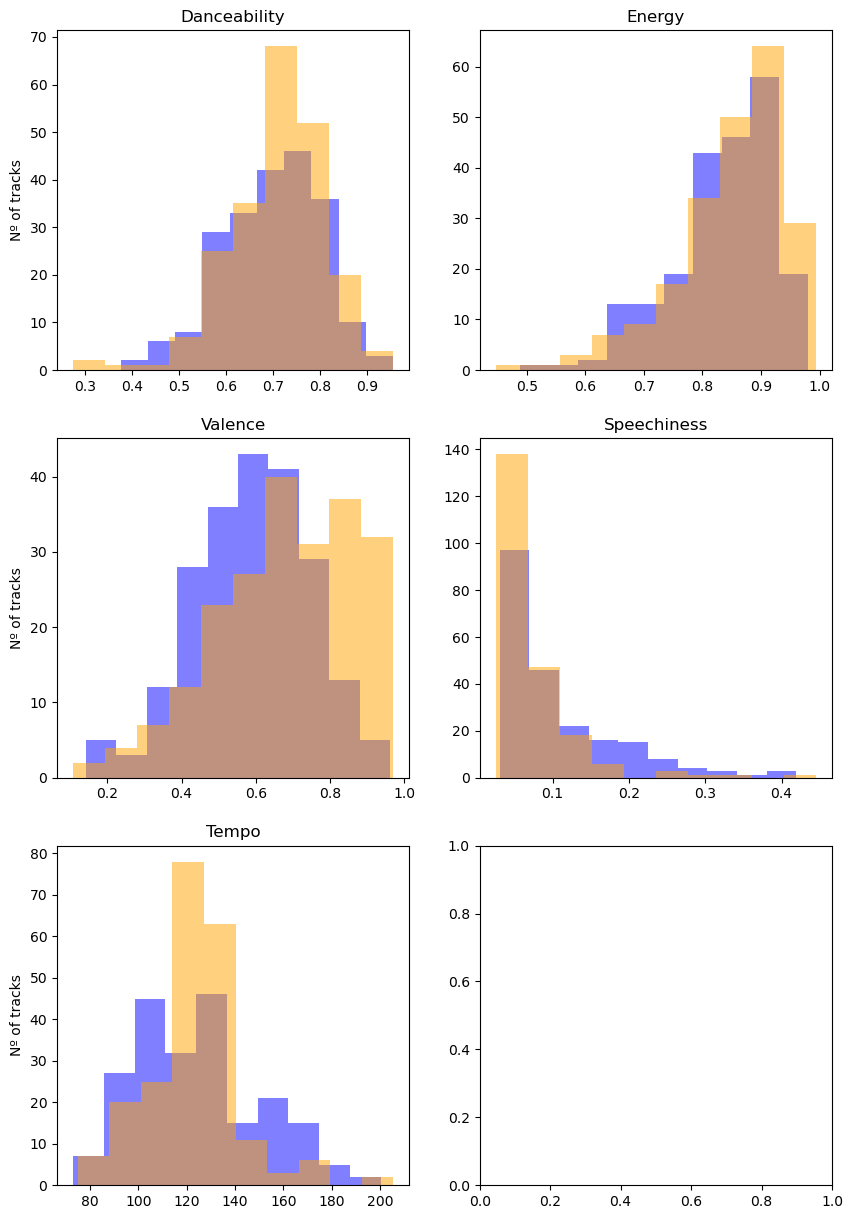

In [87]:
fig1,ax1 = plt.subplots(3,2, figsize = (10,15))
ax1[0,0].hist(combined_fourthgen_df['danceability'],
        color='blue',
           alpha=.5)
ax1[0,0].hist(combined_secgen_df['danceability'],
        color='orange',
           alpha=.5)

ax1[0,1].hist(combined_fourthgen_df['energy'],
            label = 'Fourth Gen',
        color='blue',
           alpha=.5)
ax1[0,1].hist(combined_secgen_df['energy'],
            label = 'Second Gen',
        color='orange',
           alpha=.5)

ax1[1,0].hist(combined_fourthgen_df['valence'],
        color='blue',
           alpha=.5)
ax1[1,0].hist(combined_secgen_df['valence'],
        color='orange',
           alpha=.5)

ax1[1,1].hist(combined_fourthgen_df['speechiness'],
        color='blue',
           alpha=.5)
ax1[1,1].hist(combined_secgen_df['speechiness'],
        color='orange',
           alpha=.5)

ax1[2,0].hist(combined_fourthgen_df['tempo'],
        color='blue',
           alpha=.5)
ax1[2,0].hist(combined_secgen_df['tempo'],
        color='orange',
           alpha=.5)

ax1[0,0].set_ylabel('Nº of tracks')
ax1[0,0].set_title('Danceability')
ax1[0,1].set_title('Energy')
ax1[1,0].set_ylabel('Nº of tracks')
ax1[1,0].set_title('Valence')
ax1[1,1].set_title('Speechiness')
ax1[2,0].set_ylabel('Nº of tracks')
ax1[2,0].set_title('Tempo')




plt.show()

With these graphs, it is possible to notice a difference between the generations' style of music because of how their songs are laid out in the graphs. 

Danceability and energy for both generations have a large, similar range; however, in both, the second generation tracks have a larger range. For the range difference, the second generation has more less danceable songs (0.25 to 0.95), as well as less energetic songs and songs with higher energy (0.45 to 0.99). The fourth generation danceability goes from 0.37 to  0.95, while the energy goes from almost 0.5 to 0.97. However, even though the range is large, the second generation has a peak with amost 70 songs with o.7 - 0,75 danceability (around 32% of the songs analyzed), and a peak with almost 65 tracks with 0.87 - 94 in energy (aroung 30% of the analyzed tracks). The peak for the fourth generation's danceability is around 45 tracks with 0.73- 0.77 (around 21% of the sample), and for energy is around 55 tracks with 0.87 - 94 (around 26% of the sample). This shows how the second generation had a more focused style when it comes to danceability and energy, while the fourth generation has a focused energy, but a more distributed danceability (mostly from 0.55 to 0.83).

For valence, the second generation is more leaned towards happier songs. Even though its peak is around 0.65-0.7 with almost 40 songs (19%), it has around a hundred tracks in the range of 0.7-0.95 valence (47%). Meanwhile, the fourth generation has its peak at around 0.6, with more or less 45 songs (21%), and the majority of the songs go from 0.4 to 0.8 valence. This shows how the second generation leaned more to high valence, while the fourth generation is around the middle of the valence range.

For speechiness, the second generation has almost 140 songs with 0-0.05 speechiness (65%), while the fourth generation has almost 100 in the same range (47%). The fourth generation is a little more spread from 0.06 to 0.4, while the second generation has some songs in the same range but not as many. It shows how some of the songs by fourth gen have more spoken words. One hypothesis to explain this would be the amount of rap on fourth generation songs.

The range of tempo for both generations are similar, however the way they are distributed is not. The second generation has a peak from 115 to 127 BPM with about 75 songs (35%). Close to this peak, there is another one with around 65 songs with 128-140 BPM (30%). In comparison, the fourth generation is a lot more distributed, with more songs (close to 120 tracks) around 100 and 137 BPM (56%). At the same time, while there are more 4th generation's songs with less BPM, they have more songs with more than 140 BPM than the 2nd generation. This leads to the conclusion that the second generation has a stronger focus on 120-140 BPM, while the fourth generation has more songs from 100-140, although they try other BPMs out too. 

### Box plot with Scatter plot

In order to compare the distribution of tracks and understand how they vary along the audio features' range, box plot was used. To better picture it, I used the scatter plot with it, so it displays where each track is located. With this type of graph, it is easier to comprehend the quarters of the box plot, as it will be possible to see clusters of songs and outliers.

For each graph, a variable was created for each generation audio feature analyzed. Variables for jitters were also created to make it easier to visualize the position of songs in the graphs, and transparency was used to the same objective. 

The first graph is a comparison on the danceability audio feature.

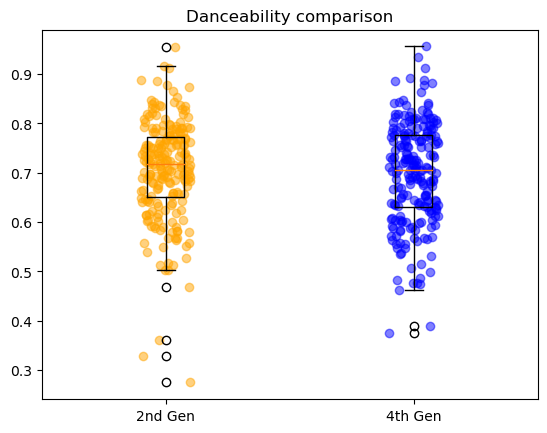

In [77]:
secgen_danceability = combined_secgen_df['danceability']
fourgen_danceability = combined_fourthgen_df['danceability']
secgen_xs2 =[1]*len(secgen_danceability)
fourgen_xs2 = [2]*len(fourgen_danceability)
secgen_x_jitter2 = np.random.uniform(-.10,.10,len(secgen_xs2))
fourgen_x_jitter2 = np.random.uniform(-.10,.10,len(fourgen_xs2))


fig5,ax5 = plt.subplots()
ax5.boxplot(secgen_danceability, positions=[1])
ax5.boxplot(fourgen_danceability , positions=[2])
ax5.scatter(secgen_xs2+secgen_x_jitter2, secgen_danceability, color = 'orange',alpha=.5)
ax5.scatter(fourgen_xs2+fourgen_x_jitter2,fourgen_danceability,color = 'blue',alpha=.5)

ax5.set_title('Danceability comparison')
plt.xticks([1, 2], ['2nd Gen', '4th Gen'])

plt.show()

With this graph, it is easy to notice how similar both generation's danceability are, with both median danceability being near 0.7. While the second generation has five outilers, one more danceable and four less danceable, the fourth generation has two outliers for being less danceable tracks. Apart from the outliers, the other crucial difference is in the size of the whiskers and inter quartile range: the second generation's are a little smaller than the fourth generations. This leads to the conclusion that the tracks of the fourth generation are more spread than the second generation's.

For the second graph, it is a comparison between both generation's energy.

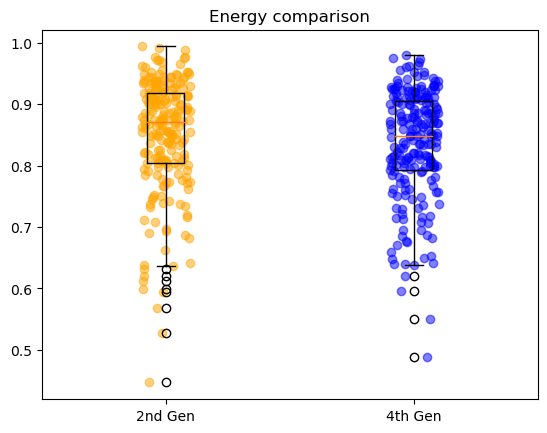

In [78]:
secgen_energy = combined_secgen_df['energy']
fourgen_energy = combined_fourthgen_df['energy']
secgen_xs =[1]*len(secgen_energy)
fourgen_xs = [2]*len(fourgen_energy)
secgen_x_jitter = np.random.uniform(-.10,.10,len(secgen_xs))
fourgen_x_jitter = np.random.uniform(-.10,.10,len(fourgen_xs))


fig2,ax2 = plt.subplots()
ax2.boxplot(secgen_energy, positions=[1])
ax2.boxplot(fourgen_energy , positions=[2])
ax2.scatter(secgen_xs+secgen_x_jitter, secgen_energy, color = 'orange', alpha=.5)
ax2.scatter(fourgen_xs+fourgen_x_jitter,fourgen_energy, color = 'blue',alpha=.5)

ax2.set_title('Energy comparison')
plt.xticks([1, 2], ['2nd Gen', '4th Gen'])


plt.show()

Here, both generations have a similar box plot size, with the average energy being around 0.85 and 0.87. The second generation has 8 outliers that have less energy, while the fourth generation has four outliers for the same reason. The median of the second generation's is more towards the Q3, while the fourth generation's is more at the middle of the inter quartile range. 

This third graph compares the valence of the generations.

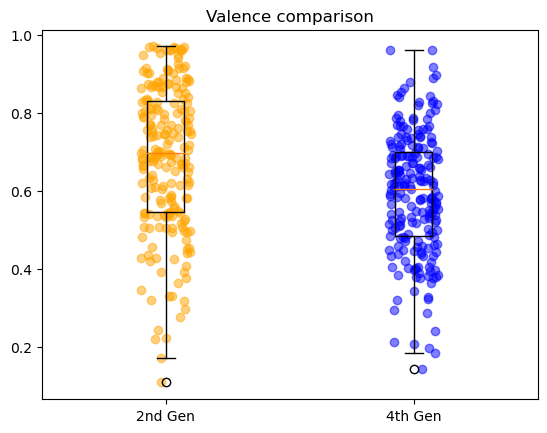

In [79]:
secgen_valence = combined_secgen_df['valence']
fourgen_valence = combined_fourthgen_df['valence']
secgen_xs1 =[1]*len(secgen_valence)
fourgen_xs1 = [2]*len(fourgen_valence)
secgen_x_jitter1 = np.random.uniform(-.10,.10,len(secgen_xs1))
fourgen_x_jitter1 = np.random.uniform(-.10,.10,len(fourgen_xs1))


fig3,ax3 = plt.subplots()
ax3.boxplot(secgen_valence, positions=[1])
ax3.boxplot(fourgen_valence , positions=[2])
ax3.scatter(secgen_xs1+secgen_x_jitter1, secgen_valence, color = 'orange',alpha=.5)
ax3.scatter(fourgen_xs1+fourgen_x_jitter1,fourgen_valence,color = 'blue',alpha=.5)

ax3.set_title('Valence comparison')
plt.xticks([1, 2], ['2nd Gen', '4th Gen'])

plt.show()

For valence, it shows how second gen's upper whisker is smaller, which means that there are a lot of songs with high valence. It is also noticeable how spaced the songs with low valence are, since the whisket bellow is larger and the scatter plot also shows this distribution - also showing an outlier. The fourth generation's box plot shows how there are more songs around 0.5 and 0.7 of valence. The average for the second generation is 0.7 when the fourth generation's is 0.6. All of this leads to the conclusion that the second generation has higher valence songs. 

The fourth graphs compares the tempo from the tracks of both generations.

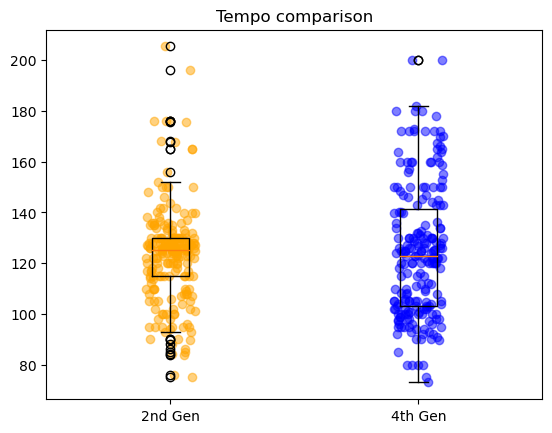

In [80]:
secgen_tempo = combined_secgen_df['tempo']
fourgen_tempo = combined_fourthgen_df['tempo']
secgen_xs3 =[1]*len(secgen_tempo)
fourgen_xs3 = [2]*len(fourgen_tempo)
secgen_x_jitter3 = np.random.uniform(-.10,.10,len(secgen_xs3))
fourgen_x_jitter3 = np.random.uniform(-.10,.10,len(fourgen_xs3))


fig4,ax4 = plt.subplots()
ax4.boxplot(secgen_tempo, positions=[1])
ax4.boxplot(fourgen_tempo , positions=[2])
ax4.scatter(secgen_xs3+secgen_x_jitter3, secgen_tempo,color = 'orange', alpha=.5)
ax4.scatter(fourgen_xs3+fourgen_x_jitter3,fourgen_tempo,color = 'blue',alpha=.5)

ax4.set_title('Tempo comparison')
plt.xticks([1, 2], ['2nd Gen', '4th Gen'])

plt.show()

Both generation's tempo average are similar, around 125 BPM. However, there is a clear difference on the distribution of the songs along the tempo range. The second generation's box plot shows that 25% of the songs are around 130 BPM - as the median is closer to the Q3, and there is a cluster of markers in that area. The fourth generation's plot shows how there is a larger distribution on the tempo used in songs, although there is a larger concentration around 125 - 130 BPM. The 2nd generation has many outliers on both sides, while the 4th generation has only one with a higher tempo. Hence, here it is possible to see more of a trend on second generation's tempo, with a few songs that leave the range of more usual tempo; while the fourth generation is more dispersed and there are more common BPMs too, but they don't necessarily go with that as the tempo for many songs. 

For the last graph containing box plots and scatter plots, the speechiness is compared.

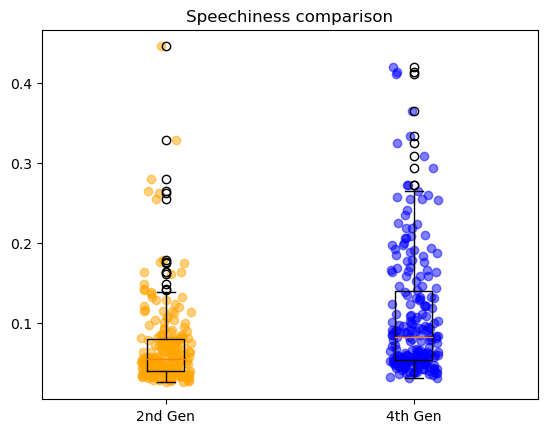

In [81]:
secgen_speechiness = combined_secgen_df['speechiness']
fourgen_speechiness = combined_fourthgen_df['speechiness']
secgen_xs4 =[1]*len(secgen_speechiness)
fourgen_xs4 = [2]*len(fourgen_speechiness)
secgen_x_jitter4 = np.random.uniform(-.10,.10,len(secgen_xs4))
fourgen_x_jitter4 = np.random.uniform(-.10,.10,len(fourgen_xs4))


fig6,ax6 = plt.subplots()
ax6.boxplot(secgen_speechiness, positions=[1])
ax6.boxplot(fourgen_speechiness , positions=[2])
ax6.scatter(secgen_xs4+secgen_x_jitter4, secgen_speechiness, color = 'orange',alpha=.5)
ax6.scatter(fourgen_xs4+fourgen_x_jitter4,fourgen_speechiness,color = 'blue',alpha=.5)

ax6.set_title('Speechiness comparison')
plt.xticks([1, 2], ['2nd Gen', '4th Gen'])

plt.show()

Both generations have a higher concentration of low speechiness, and their average are both lower than 0.1 -- but the fourth generation's average is higher. The upper whisker of the fourth generation is longer than the second generation's, showing how much more speechiness they normally have in their songs.

So, looking at all of the box plot with scatter plots above lead to the conclusion that the second generation has a more focus style of each audio feature, while the fourth generation tries out different styles (as their tracks have a more scattered values). When comparing outliers, it is possible to conclude that there are fewer for 4th generation because they try out more different styles, which lead them to have less songs that are too out of the most common.

### Scatter plots

Then, I decided to make scatter plots of different combinations of how the audio features could relate. This way, I can look for different types of relationships between audio features. This will help understanding more about each generation style of music and if there are more trends than what was seen on the other graphs.

For the first plot, I stablished danceability as the y-axis. Then, for each x-axis, I put a different audio feature of the remaing four: valence, tempo, energy, and speechiness. Just like the other graphs, the second generation is orange, the fourth generation is blue.

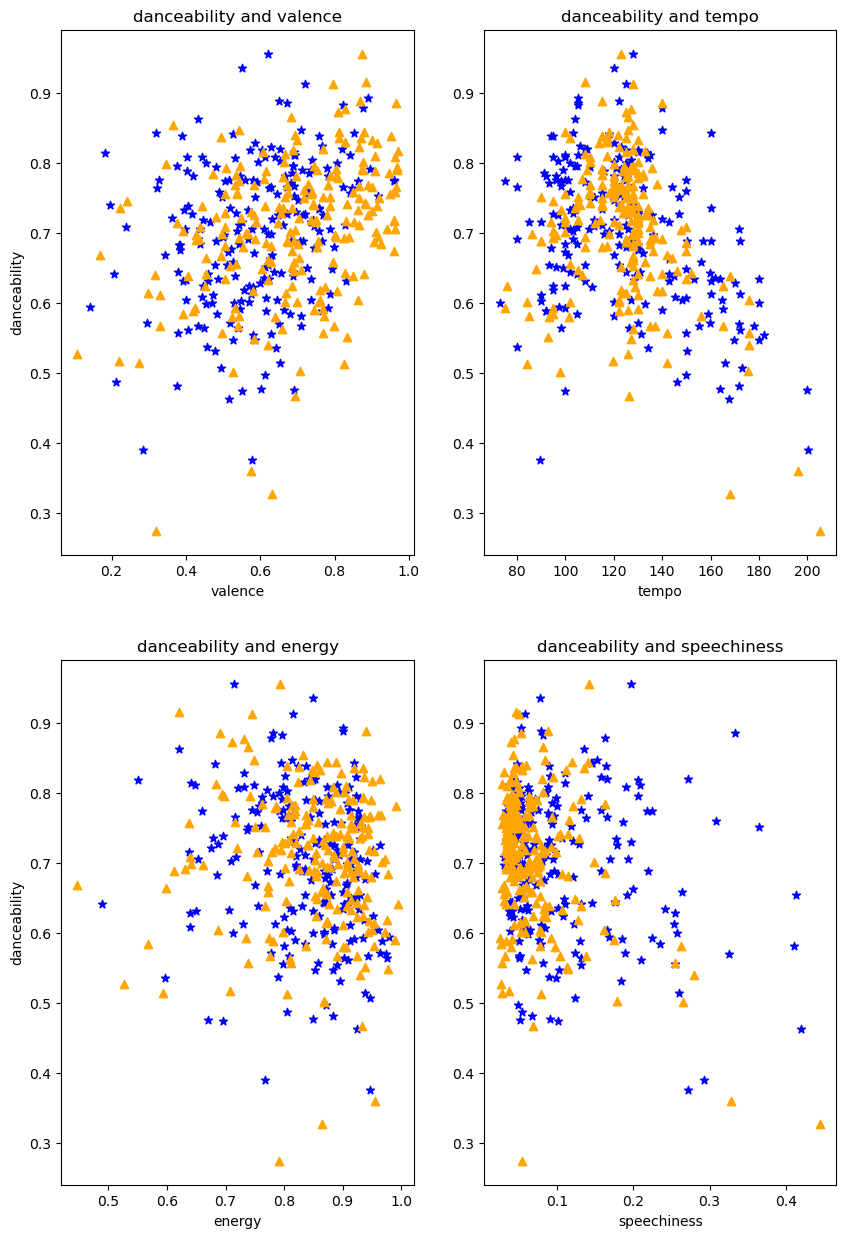

In [82]:
fig7,ax7 = plt.subplots(2,2, figsize = (10,15))
ax7[0,0].scatter(x= combined_fourthgen_df['valence'],
                y= combined_fourthgen_df['danceability'],
                label='Fourth Gen',
                color='blue',
                marker='*')
ax7[0,0].scatter(x= combined_secgen_df['valence'],
                y= combined_secgen_df['danceability'],
                label = 'Second Gen',
               color='orange',
               marker='^')
ax7[0,0].set_ylabel('danceability')
ax7[0,0].set_xlabel('valence')
ax7[0,0].set_title('danceability and valence')

ax7[0,1].scatter(x= combined_fourthgen_df['tempo'],
                y= combined_fourthgen_df['danceability'],
               label='Fourth Gen',
               color='blue',
               marker='*')
ax7[0,1].scatter(x= combined_secgen_df['tempo'],
                y= combined_secgen_df['danceability'],
                label = 'Second Gen',
                color='orange',
                marker='^')
ax7[0,1].set_xlabel('tempo')
ax7[0,1].set_title('danceability and tempo')

ax7[1,0].scatter(x= combined_fourthgen_df['energy'],
               y= combined_fourthgen_df['danceability'],
                 label='Fourth Gen',
                 color='blue',
                 marker='*')
ax7[1,0].scatter(x= combined_secgen_df['energy'],
                y= combined_secgen_df['danceability'],
                label = 'Second Gen',
                color='orange',
                marker='^')
ax7[1,0].set_ylabel('danceability')
ax7[1,0].set_xlabel('energy')
ax7[1,0].set_title('danceability and energy')

ax7[1,1].scatter(x= combined_fourthgen_df['speechiness'],
               y= combined_fourthgen_df['danceability'],
                 label='Fourth Gen',
               color='blue',
               marker='*')
ax7[1,1].scatter(x= combined_secgen_df['speechiness'],
                y= combined_secgen_df['danceability'],
                label = 'Second Gen',
                color='orange',
                marker='^')
ax7[1,1].set_xlabel('speechiness')
ax7[1,1].set_title('danceability and speechiness')


plt.show()

With these graphs, it is clear how the relationship between danceability and valence, and danceability and energy for both generation is similar. Meanwhile, for danceability and tempo and danceability and speechiness shows how the second generation has a stronger focus on tempo and speechiness, as there is less relationship between those features. For the fourth generation, danceability and tempo are more negatively related; danceability and speechiness also have a weak relationship - as there is more scatter around the graph.

For the next plot, I stablished energy as the y-axis, and for the x-axis I used valence, tempo, and speechiness. I did not use danceability as the graph above already shows their relationship.

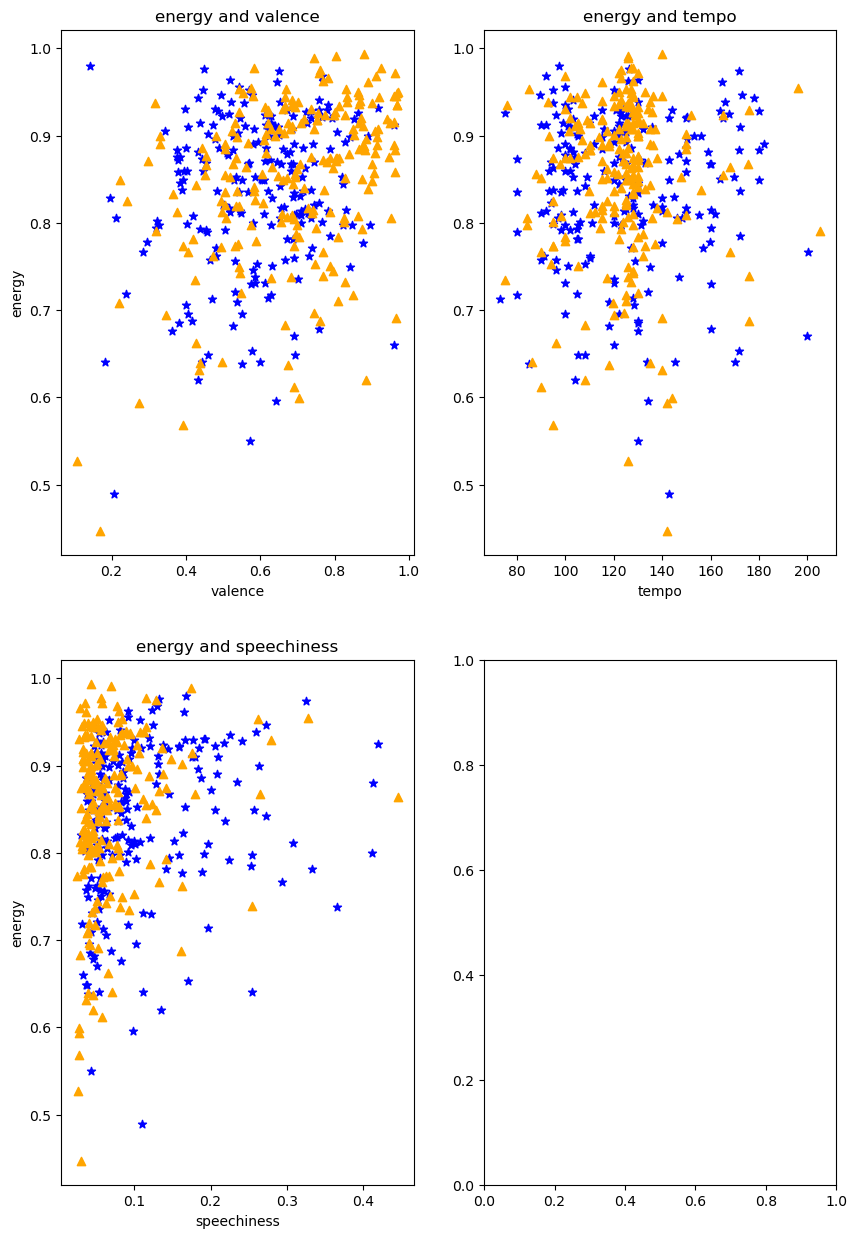

In [83]:
fig8,ax8 = plt.subplots(2,2, figsize = (10,15))
ax8[0,0].scatter(x= combined_fourthgen_df['valence'],
                y= combined_fourthgen_df['energy'],
                label='Fourth Gen',
                color='blue',
                marker='*')
ax8[0,0].scatter(x= combined_secgen_df['valence'],
                y= combined_secgen_df['energy'],
                label = 'Second Gen',
               color='orange',
               marker='^')
ax8[0,0].set_ylabel('energy')
ax8[0,0].set_xlabel('valence')
ax8[0,0].set_title('energy and valence')

ax8[0,1].scatter(x= combined_fourthgen_df['tempo'],
                y= combined_fourthgen_df['energy'],
               label='Fourth Gen',
               color='blue',
               marker='*')
ax8[0,1].scatter(x= combined_secgen_df['tempo'],
                y= combined_secgen_df['energy'],
                label = 'Second Gen',
                color='orange',
                marker='^')
ax8[0,1].set_xlabel('tempo')
ax8[0,1].set_title('energy and tempo')

ax8[1,0].scatter(x= combined_fourthgen_df['speechiness'],
               y= combined_fourthgen_df['energy'],
                 label='Fourth Gen',
                 color='blue',
                 marker='*')
ax8[1,0].scatter(x= combined_secgen_df['speechiness'],
                y= combined_secgen_df['energy'],
                label = 'Second Gen',
                color='orange',
                marker='^')
ax8[1,0].set_ylabel('energy')
ax8[1,0].set_xlabel('speechiness')
ax8[1,0].set_title('energy and speechiness')


plt.show()

With these graphs, it is noticeable how for both generations energy and valence are more correlated positively - but it is stronger for the second generation, probably because they have a more defined style looking at the previous graphs.

For energy and tempo, there is the same cluster of songs around 130 BPM, as both generations have a lot of songs with that value, and we can notice how energy and tempo is not related for both generations. The amount of energy is also not related to the amount of speechiness in a song for both generations; however, if we disconsider the lowest speechiness, it is possible to see how for some songs, the more energy a song has, the speechiness increases too a bit.

For the following plot, I stablished tempo as the y-axis. For the x-axis, only valence and speechiness were used as these are the only ones that were not analysed previously.

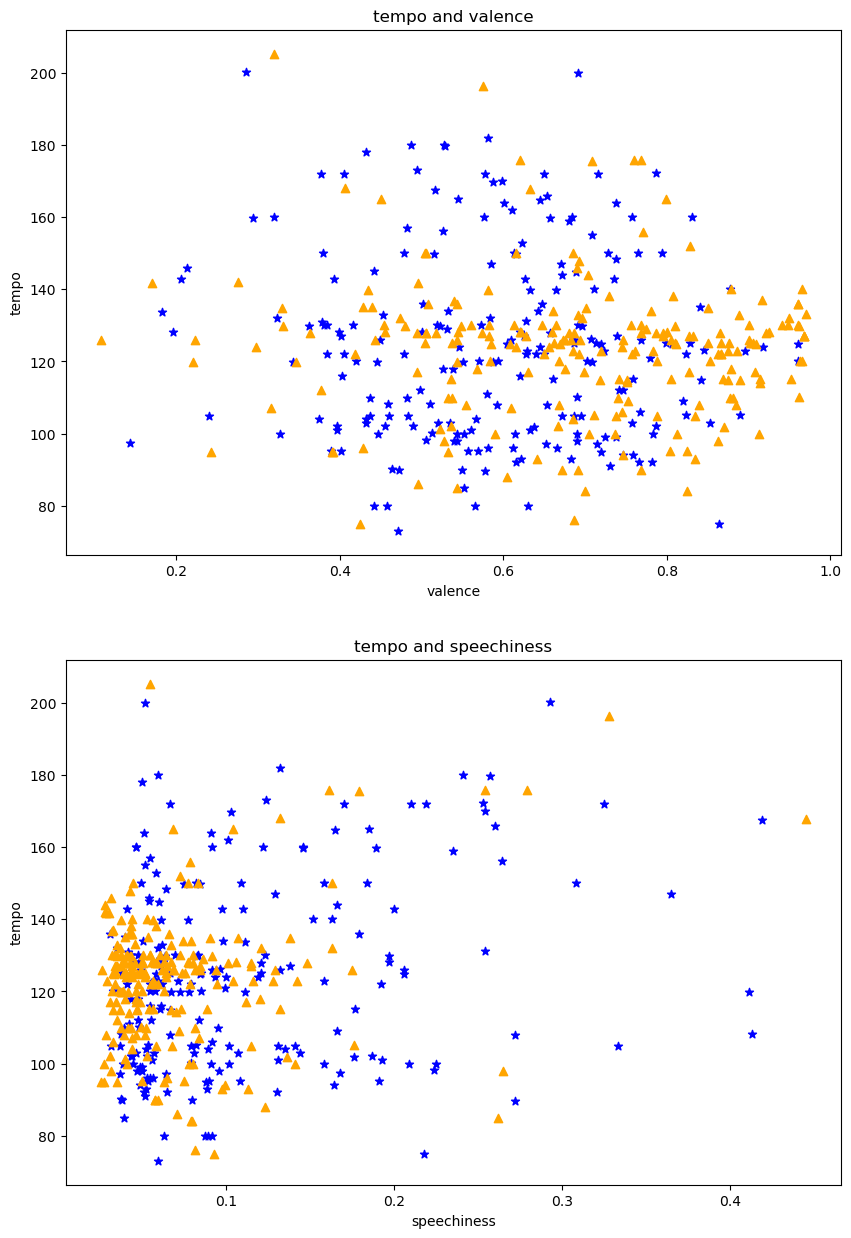

In [84]:
fig9,ax9 = plt.subplots(2,1, figsize = (10,15))
ax9[0].scatter(x= combined_fourthgen_df['valence'],
                y= combined_fourthgen_df['tempo'],
                label='Fourth Gen',
                color='blue',
                marker='*')
ax9[0].scatter(x= combined_secgen_df['valence'],
                y= combined_secgen_df['tempo'],
                label = 'Second Gen',
               color='orange',
               marker='^')
ax9[0].set_ylabel('tempo')
ax9[0].set_xlabel('valence')
ax9[0].set_title('tempo and valence')

ax9[1].scatter(x= combined_fourthgen_df['speechiness'],
                y= combined_fourthgen_df['tempo'],
               label='Fourth Gen',
               color='blue',
               marker='*')
ax9[1].scatter(x= combined_secgen_df['speechiness'],
                y= combined_secgen_df['tempo'],
                label = 'Second Gen',
                color='orange',
                marker='^')
ax9[1].set_ylabel('tempo')
ax9[1].set_xlabel('speechiness')
ax9[1].set_title('tempo and speechiness')


plt.show()

Although for both of them it shows how their tempo relationship with valence and speechiness are weak (mainly because of the amount of songs with around 130 BPM), it shows how different the distribution of second and fourth generation tracks are. It is possible to see how the fourth generation tries out more combinations than the second generation.

For the last plot, I stablished valence as the y-axis and only compared it to speechiness.

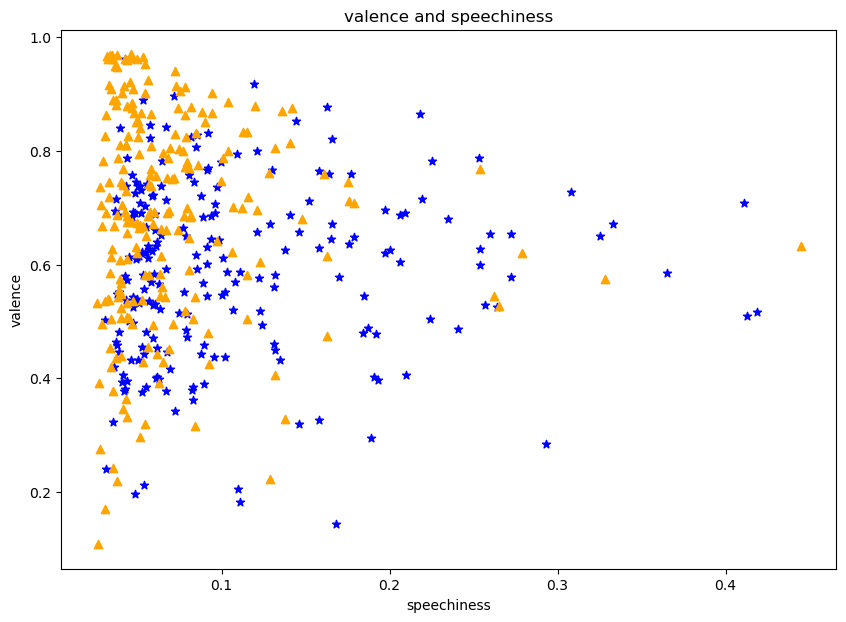

In [85]:
fig10,ax10 = plt.subplots(figsize = (10,7))

ax10.scatter(x= combined_fourthgen_df['speechiness'],
               y= combined_fourthgen_df['valence'],
                 label='Fourth Gen',
               color='blue',
               marker='*')
ax10.scatter(x= combined_secgen_df['speechiness'],
                y= combined_secgen_df['valence'],
                label = 'Second Gen',
                color='orange',
                marker='^')
ax10.set_ylabel('valence')
ax10.set_xlabel('speechiness')
ax10.set_title('valence and speechiness')

plt.show()

Although the correlation is weak, it is possible to notice how, for both generations, songs with medium valence (around 0.5 and 0.7) have more speechiness than the other songs with high and low valence -- this applies more to fourth generation songs.

## Conclusion

Looking at all the information gathered and at all of the graphs, it is possible to conclude that there is indeed a difference in the music style of each generation. This confirms my initial idea that it is clear which songs are from the second generation, as when analyzing the graphs it leads to the conclusion that the artists from this generation have a more defined style: low speechiness, a great part of songs with around 130 BPM, medium to high valence, a stronger focus on medium to high energy, and medium danceability. Meanwhile, although the fourth generation does have a focus on specific ranges of each audio features, when comparing both generations, it is noticeable that the fourth generation tries out more different styles and has more songs out of the "trend" of the generation. The fourth generation's focus is medium danceability and valence, medium to high energy, around 100 and 130 BPM, and lower speechines (around 0 and also closer to 1). 

Another part of the analysis was covering the relationship between the audio features of a generation, as it also helps undertanding their musical style better. It also helps understanding how both generations' tracks are scattered along the graphs, making it easier to visualize the differences. None of the audio features had a strong trend and relation with each other, but the strongest relations were danceability and tempo for the fourth generation, and energy and valence for the second generation; hence, it shows how each generatioin has a different trend.

The limitations of this report is that only 215 songs of each generation were analyzed, and although it is not a small sample, it does not comprise of every song made by each generation. In addition, only five audio features were analyzed, making it limited to those specific features. Hence, another way to approach this analysis, that can be used in a future version of this project, is analyzing more audio features and having a larger sample of songs (using more songs of less known groups and more B-sides, to get a larger scope). This way, there would be a larger scope that would contain more than just most famous groups, title tracks, and B-sides, provinding a deeper analysis.